In [1]:
from datetime import datetime as dt


# Synthetic dataset
from sklearn.datasets import make_classification# Data processing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

import pandas as pd
import numpy as np
from collections import Counter

import plotly.graph_objects as go

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model and performance
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from keras.utils.vis_utils import plot_model

import scipy.cluster.hierarchy as sch

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error

In [2]:
dataset1 = pd.read_csv('C:/Users/aggelosuser/Desktop/test9after.csv', parse_dates=True)#, index_col="time")

In [3]:
dataset1 = dataset1.drop(["PS1_V"], axis = 1)

In [4]:
dataset1

,MEM_USAGE,CPU_USAGE,TEMP
0,26.505572,6.800000,28.25
1,26.505572,7.200000,28.25
2,26.505572,42.000000,28.25
3,26.505572,14.960630,28.25
4,26.505572,9.225092,28.25
...,...,...,...
15458,25.602151,68.131868,32.00
15459,25.602151,68.131868,32.00
15460,25.602151,68.131868,32.00
15461,25.602151,68.131868,32.00


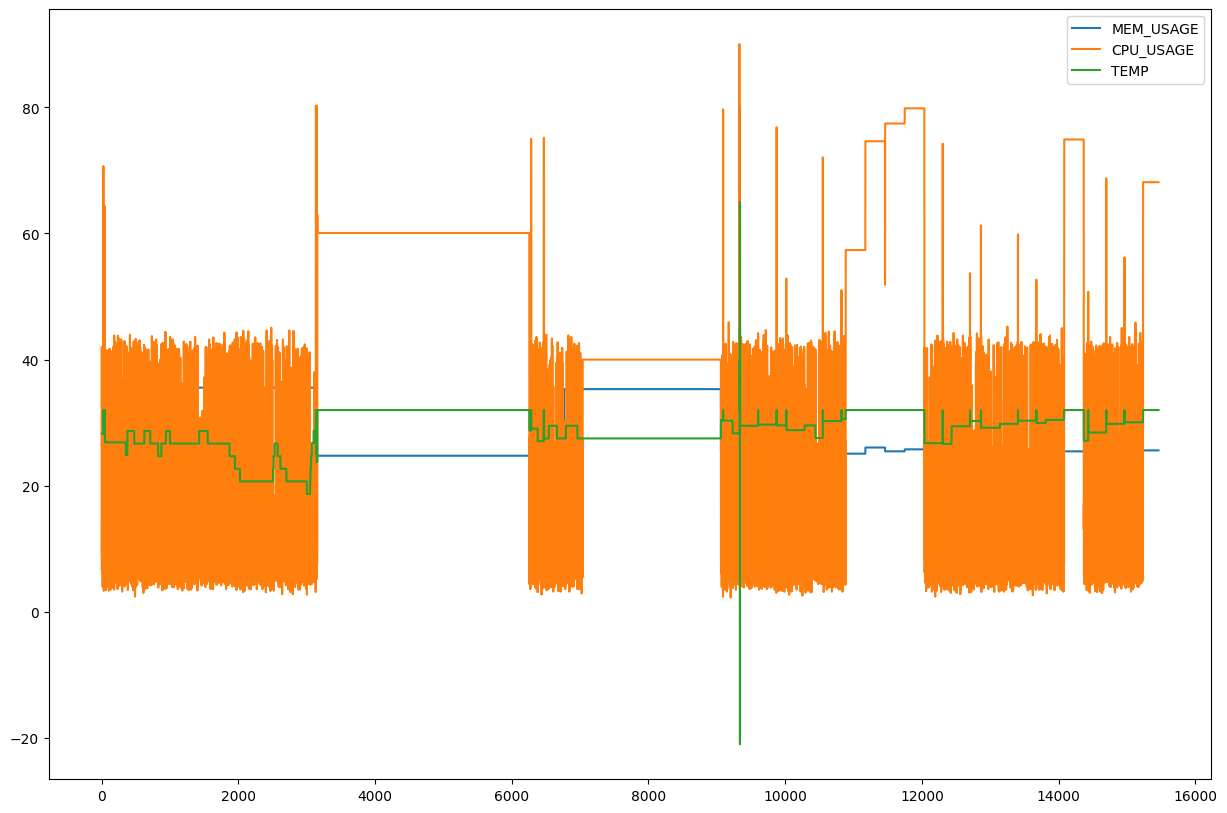

In [5]:
dataset1.plot(figsize=(15, 10))
plt.show()

In [6]:
dataset = dataset1.iloc[:3150]

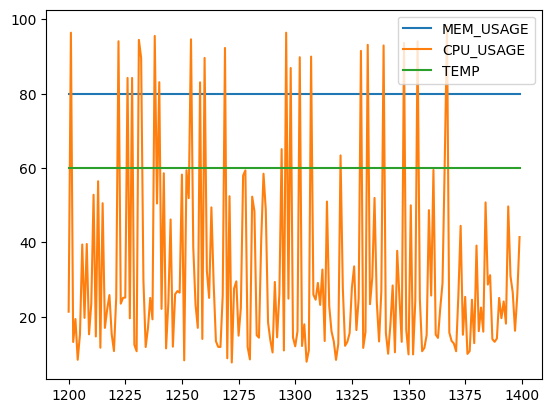

200


C:\Users\aggelosuser\AppData\Local\Temp\ipykernel_39352\1968131861.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = dataset.append(noise,ignore_index=True)


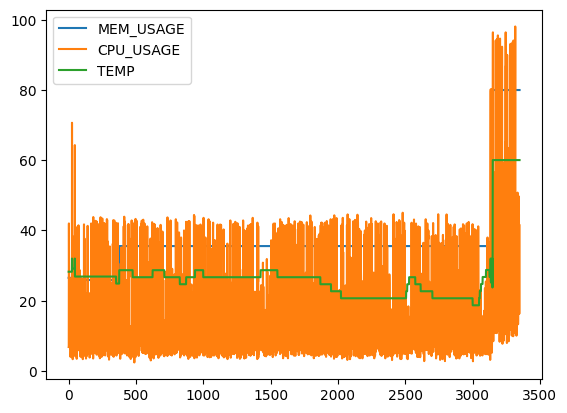

In [7]:
#ADD_NOISE

#test = dataset.iloc[1900:2100]
noise = dataset.iloc[1200:1400]
noise = noise*2.25
#for i in range(len(noised)):
#    if dataset_noised['CPU_USAGE'].iloc[i] < 50 :
#        dataset_noised['CPU_USAGE'].iloc[i] += 20

noise.plot()
plt.show()

#count_anomalies
c=0
for i in range(len(noise)):
    if ((noise['CPU_USAGE'].iloc[i] > 90) or (noise['MEM_USAGE'].iloc[i] > 90) or (noise['TEMP'].iloc[i] > 60)):
        c=c+1
print(c)

df = dataset.append(noise,ignore_index=True)

df.plot()
plt.show()

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MEM_USAGE,3350.0,37.073486,11.255553,24.413479,35.555417,35.555417,35.555417,79.999687
CPU_USAGE,3350.0,15.143048,13.193201,2.400000,6.719368,10.400000,19.617549,98.100000
TEMP,3350.0,27.101940,8.796278,18.687000,22.687000,26.687000,26.875000,60.045751


In [9]:
y_true = np.zeros(df.shape[0])
y_true[dataset.shape[0]:] = 1
print(y_true)
#print(y_pred)

[0. 0. 0. ... 1. 1. 1.]


ISOLATION FOREST

In [205]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load the dataset
data = df

# Split the data into features and target
features = ['CPU_USAGE','MEM_USAGE','TEMP']

# Train an Isolation Forest model for anomaly detection
model = IsolationForest(n_estimators=100, contamination=0.2, random_state=42)
#model = IsolationForest(contamination=0.1)
model.fit(data[features])

# Predict the anomaly scores for each sample
anomaly_scores = model.decision_function(df[features])

# Determine the outliers based on the anomaly scores
#outlier_indexes = np.where(anomaly_scores < -0.05)[0]

# Print the outliers

#threshold = 0
threshold = np.percentile(anomaly_scores, 2)
# identify the samples that are considered anomalies
#anomalies = np.where(scores < threshold)



# Use the residuals to detect anomalies
anomalies = []
values = []
index = []
y_pred = []
for i, resid in enumerate(anomaly_scores):
    if anomaly_scores[i] < threshold:
        anomalies.append(i)
        #values.append(moving_average.iloc[i].at["values"])
        values.append(df.iloc[i])
        index.append(i)
        y_pred.append(1)
    else:
        y_pred.append(0)
print(f'Anomalies detected at indexes: {anomalies}')

Anomalies detected at indexes: [25, 46, 3134, 3135, 3146, 3147, 3149, 3151, 3154, 3156, 3158, 3161, 3163, 3165, 3172, 3176, 3178, 3181, 3182, 3188, 3189, 3190, 3192, 3195, 3200, 3201, 3202, 3203, 3204, 3205, 3208, 3210, 3213, 3219, 3221, 3227, 3228, 3231, 3232, 3235, 3236, 3237, 3244, 3246, 3248, 3252, 3257, 3264, 3268, 3270, 3279, 3282, 3285, 3289, 3295, 3298, 3301, 3304, 3309, 3311, 3316, 3317, 3323, 3330, 3334, 3344, 3349]


C:\Users\aggelosuser\anaconda3\envs\predictive_maintenance\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [206]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_true, y_pred)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy_score :", acc)
print("roc_auc :", roc_auc)

Precision: 0.8955223880597015
Recall: 0.3
F1 Score: 0.449438202247191
Accuracy_score : 0.9561194029850746
roc_auc : 0.6488888888888888


In [207]:
import plotly.graph_objects as go


thrs = np.full((anomaly_scores.shape[0]),threshold)
fig = go.Figure()
fig.add_trace(go.Scatter(x = np.arange(5000), y=anomaly_scores, name='Scores'))
fig.add_trace(go.Scatter(x=np.arange(5000), y=thrs, name='Threshold'))
fig.update_layout(showlegend=True, title='Scores vs. Threshold')
fig.show()

0
1
2


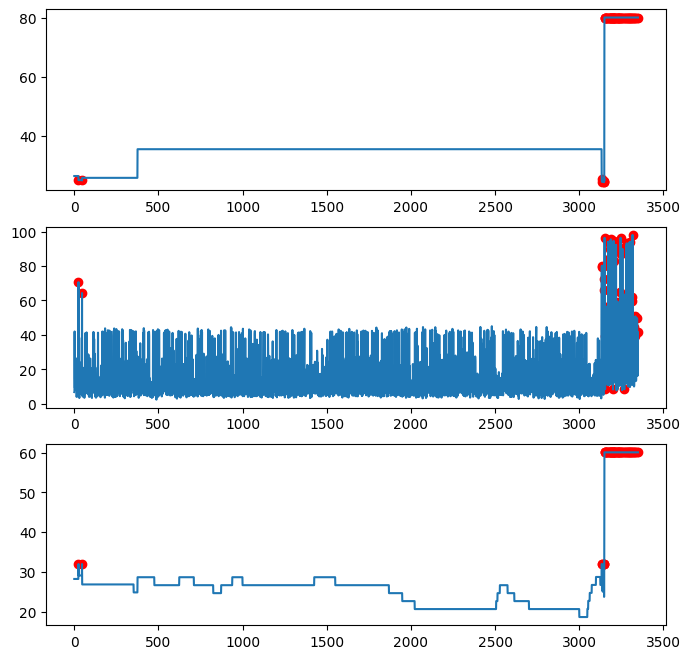

In [13]:
# Create a figure with 4 subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
features = ['MEM_USAGE','CPU_USAGE','TEMP']
#features = ['CPU_USE','MEM_USE', 'PS1_V','TEMP']
# Plot the time series data for each feature
for i in range(3):
    axs[i].plot(df[features[i]])
    print(i)
#    axs[i].set_title(features[i])
    for j in range(len(anomalies)):
        axs[i].scatter(anomalies[j], df.iloc[anomalies[j],i], color='r', marker='o')
#    for j in range(len(true_anomalies)):
#        axs[i].scatter(true_anomalies[j], dataset.iloc[true_anomalies[j],i], color='y', marker='o')


# Show the plot
plt.show()

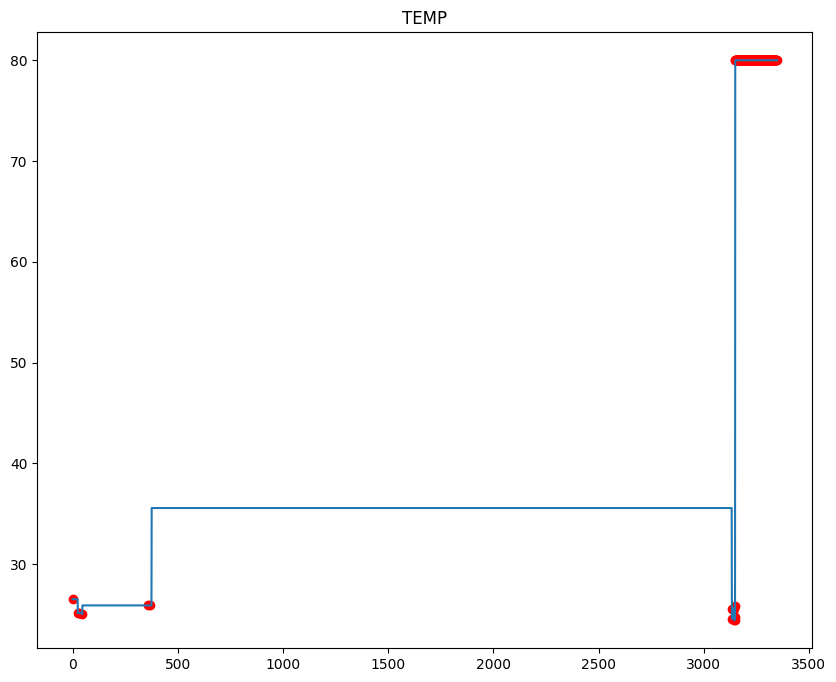

In [41]:
# Create a figure with 4 subplots
#fig, axs = plt.subplots(1, 1, figsize=(10, 8))
features = ['CPU_USAGE','MEM_USAGE','TEMP']



# Create a figure with 4 subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 8))

# Plot the time series data for each feature
axs.plot(df[features[1]])
for j in range(len(anomalies)):
    axs.scatter(anomalies[j], df.iloc[anomalies[j],0], color='r', marker='o')
axs.set_title('TEMP')

# Show the plot
plt.show()

DBSCAN

In [200]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# load your timeseries dataset
# select the features you want to use for anomaly detection
#X = data[["feature_1", "feature_2", "feature_3", "feature_4"]].values
X = df
# normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

mi_sam = int(0.2*len(df)) #np.percentile(len(df), 2)
#mi_sam = np.int(np.percentile(len(df), 0.00050))
print(mi_sam)
# fit the DBSCAN model to the data
model = DBSCAN(eps=2, min_samples=mi_sam) #=200)
model.fit(X)

# obtain the cluster labels for each instance
labels = model.labels_

# find the instances that are considered outliers (i.e. not assigned to a cluster)
#anomalies = np.where(labels == -1)
y_pred = []
values = []
index = []
anomalies=[]
for i in range(len(labels)):
    if labels[i] == -1 :
        y_pred.append(1)
        anomalies.append(i)
        values.append(df.iloc[i])
        index.append(i)
    else:
        y_pred.append(0)        
        
print(y_pred)
# print the indices of the anomalous instances
print(f'Anomalies detected at indexes: {anomalies}')
print("Anomalous instances:", len(anomalies))

670
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [201]:
roc_auc = roc_auc_score(y_true, y_pred)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy_score :", acc)
print("roc_auc :", roc_auc)

Precision: 0.975609756097561
Recall: 1.0
F1 Score: 0.9876543209876543
Accuracy_score : 0.9985074626865672
roc_auc : 0.9992063492063492


0
1
2


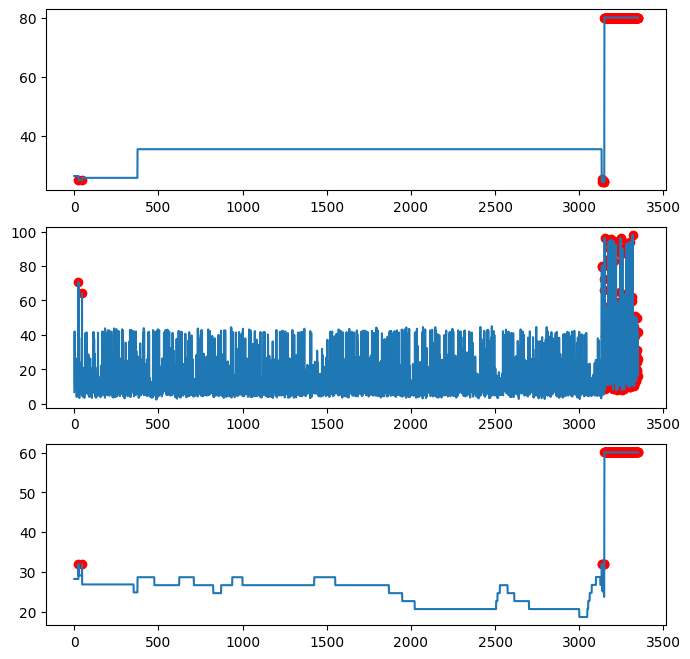

In [104]:
# Create a figure with 4 subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
features = ['MEM_USAGE','CPU_USAGE','TEMP']
#features = ['CPU_USE','MEM_USE', 'PS1_V','TEMP']
# Plot the time series data for each feature
for i in range(3):
    axs[i].plot(df[features[i]])
    print(i)
#    axs[i].set_title(features[i])
    for j in range(len(anomalies)):
        axs[i].scatter(anomalies[j], df.iloc[anomalies[j],i], color='r', marker='o')
#    for j in range(len(true_anomalies)):
#        axs[i].scatter(true_anomalies[j], dataset.iloc[true_anomalies[j],i], color='y', marker='o')


# Show the plot
plt.show()

DEEP CONVOLUTIONAL AUTOENCODER

(3150, 3)
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 3, 16)             64        
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 2, 16)             0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 2, 8)              392       
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 1, 8)              0         
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 1, 8)              200       
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 1, 8)        

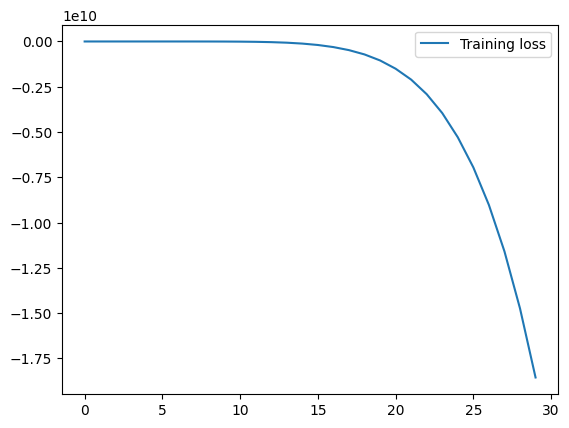

In [52]:
import numpy as np
import pandas as pd
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Dense
from keras.models import Model
from keras import backend as K

# load the data
#data = pd.read_csv("data.csv")

# extract the features and labels
#X = dataset_healthy.iloc[:, :4].values
X=dataset
X=np.array(X)
# normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(X.shape)
# build the autoencoder model
input_data = Input(shape=(X.shape[1], 1))
x = Conv1D(16, 3, activation='relu', padding='same')(input_data)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)

# at this point the representation is (4, 8)
x = Conv1D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
x = Conv1D(16, 3, activation='relu')(x)
x = UpSampling1D(3)(x)
x = MaxPooling1D(2, padding='same')(x)
decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #binary_crossentropy
autoencoder.summary()

# Create a TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')


# reshape the data for the autoencoder
X = X.reshape(X.shape[0], X.shape[1], 1)

# train the autoencoder
history = autoencoder.fit(X, X, epochs=30, batch_size=64, callbacks=[tensorboard_callback], verbose=0)
plt.plot(history.history['loss'], label='Training loss')
#plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

# calculate the reconstruction error for each sample
reconstruction_error = []
for i in range(X.shape[0]):
    x = X[i].reshape(1, X.shape[1], 1)
    reconstructed = autoencoder.predict(x)
    reconstruction_error.append(np.mean(np.square(x - reconstructed)))


# define the threshold for anomaly detection
#threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)
threshold = np.max(reconstruction_error)
# detect anomalies

reconstruction_error = []
rec = np.array(df)
rec = (rec - np.mean(rec, axis=0)) / np.std(rec, axis=0)
for i in range(rec.shape[0]):
    x = rec[i].reshape(1, rec.shape[1], 1)
    reconstructed = autoencoder.predict(x)
    reconstruction_error.append(np.mean(np.square(x - reconstructed)))


anomalies = []
y_pred = []
for i in range(len(reconstruction_error)):
    if reconstruction_error[i] > threshold:
        anomalies.append(i)
        y_pred.append(1)
    else:
        y_pred.append(0)

# print the anomalies
print(anomalies)
#print(y_pred.shape)

In [40]:
roc_auc = roc_auc_score(y_true, y_pred)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy_score :", acc)
print("roc_auc :", roc_auc)

Precision: 1.0
Recall: 0.11
F1 Score: 0.19819819819819817
Accuracy_score : 0.946865671641791
roc_auc : 0.555


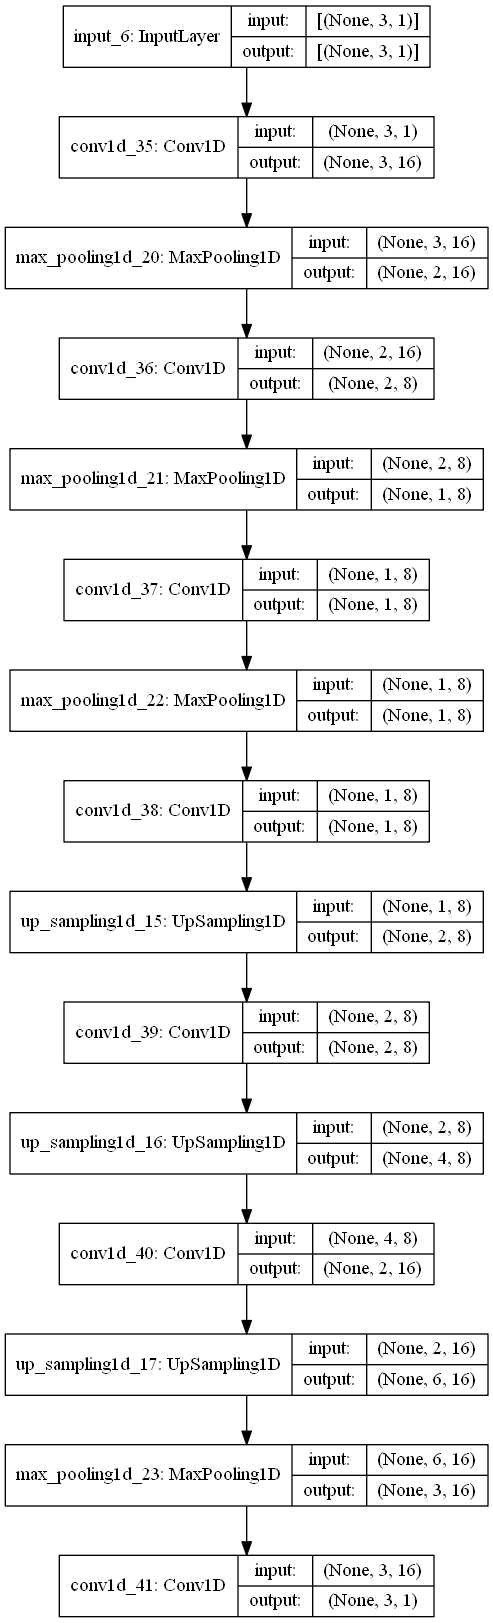

In [41]:
from tensorflow.keras.utils import plot_model
# Plot the model
plot_model(autoencoder, show_shapes=True, to_file='model.png')

In [77]:
autoencoder.save("neural_network.h5")

In [78]:
#!pip install netron
autoencoder.save("neural_network.h5")
# Load the model in Netron
import netron
netron.start('neural_network.h5')


Serving 'neural_network.h5' at http://localhost:8080


('localhost', 8080)

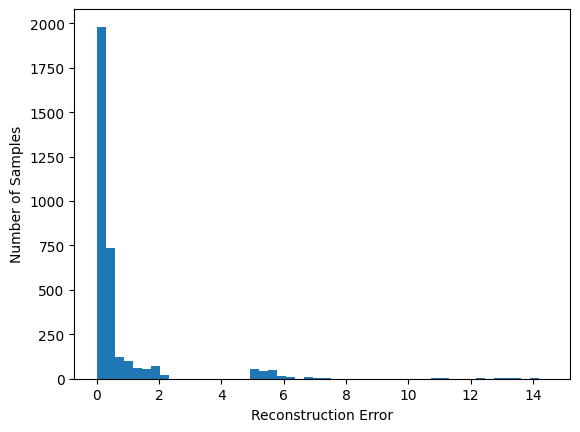

In [17]:
#Plot the reconstruction error
plt.hist(reconstruction_error, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("Number of Samples")
plt.show()

0
1
2


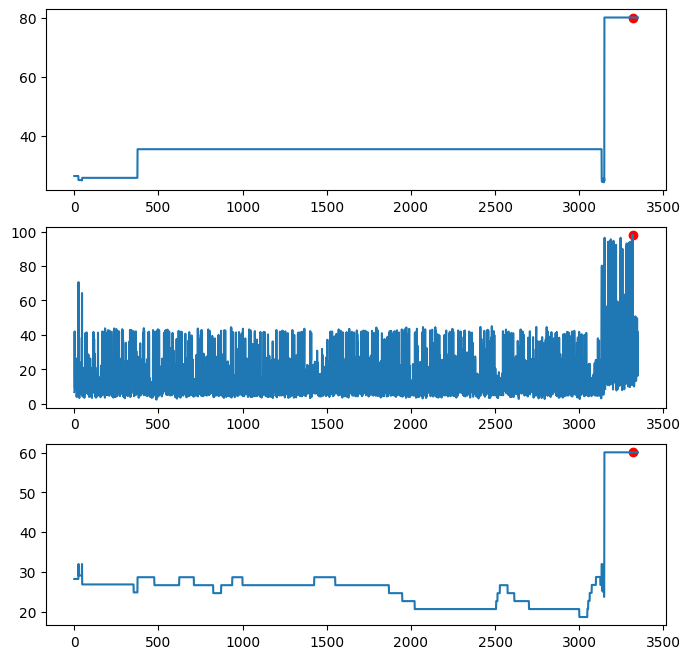

In [28]:
# Create a figure with 4 subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
features = ['MEM_USAGE','CPU_USAGE','TEMP']
#features = ['CPU_USE','MEM_USE', 'PS1_V','TEMP']
# Plot the time series data for each feature
for i in range(3):
    axs[i].plot(df[features[i]])
    print(i)
#    axs[i].set_title(features[i])
    for j in range(len(anomalies)):
        axs[i].scatter(anomalies[j], df.iloc[anomalies[j],i], color='r', marker='o')
#    for j in range(len(true_anomalies)):
#        axs[i].scatter(true_anomalies[j], dataset.iloc[true_anomalies[j],i], color='y', marker='o')


# Show the plot
plt.show()

LSTM AUTOENCODER

In [128]:
from sklearn.preprocessing import MinMaxScaler

X=dataset
X=np.array(X)

X_test = df
X_test = np.array(X_test)
# normalize the data
#X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
#print(X.shape)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X_test)



In [129]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("training data shape : ", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("testing data shape : ", X_test.shape)

training data shape :  (3150, 1, 3)
testing data shape :  (3350, 1, 3)


In [130]:
from tensorflow.keras.layers import LSTM, RepeatVector,TimeDistributed
    
def Autoencoder_model(X):
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True)(inputs)
    L2 = LSTM(8, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X_train.shape[1])(L2)
    L4 = LSTM(8, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X_train.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model


In [131]:
model = Autoencoder_model(X)
model.compile(optimizer='adam', loss='mae') # validation_split=0.05
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 1, 3)]            0         
_________________________________________________________________
lstm_59 (LSTM)               (None, 1, 16)             1280      
_________________________________________________________________
lstm_60 (LSTM)               (None, 8)                 800       
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 1, 8)              0         
_________________________________________________________________
lstm_61 (LSTM)               (None, 1, 8)              544       
_________________________________________________________________
lstm_62 (LSTM)               (None, 1, 16)             1600      
_________________________________________________________________
time_distributed_11 (TimeDis (None, 1, 3)              51 

In [180]:
nb_epochs = 20
batch_size = 16
history = model.fit(X_train, X_train, epochs = nb_epochs, batch_size= batch_size,
                    validation_split=0.05)

Epoch 1/20
187/187 [==============================] - 5s 13ms/step - loss: 0.0353 - val_loss: 0.0723
Epoch 2/20
187/187 [==============================] - 2s 13ms/step - loss: 0.0351 - val_loss: 0.0717
Epoch 3/20
187/187 [==============================] - 2s 13ms/step - loss: 0.0354 - val_loss: 0.0723
Epoch 4/20
187/187 [==============================] - 2s 13ms/step - loss: 0.0354 - val_loss: 0.0716
Epoch 5/20
187/187 [==============================] - 2s 13ms/step - loss: 0.0350 - val_loss: 0.0733
Epoch 6/20
187/187 [==============================] - 2s 13ms/step - loss: 0.0354 - val_loss: 0.0727
Epoch 7/20
187/187 [==============================] - 2s 13ms/step - loss: 0.0352 - val_loss: 0.0740
Epoch 8/20
187/187 [==============================] - 2s 12ms/step - loss: 0.0363 - val_loss: 0.0735
Epoch 9/20
187/187 [==============================] - 2s 13ms/step - loss: 0.0355 - val_loss: 0.0734
Epoch 10/20
187/187 [==============================] - 2s 12ms/step - loss: 0.0354 - val_lo

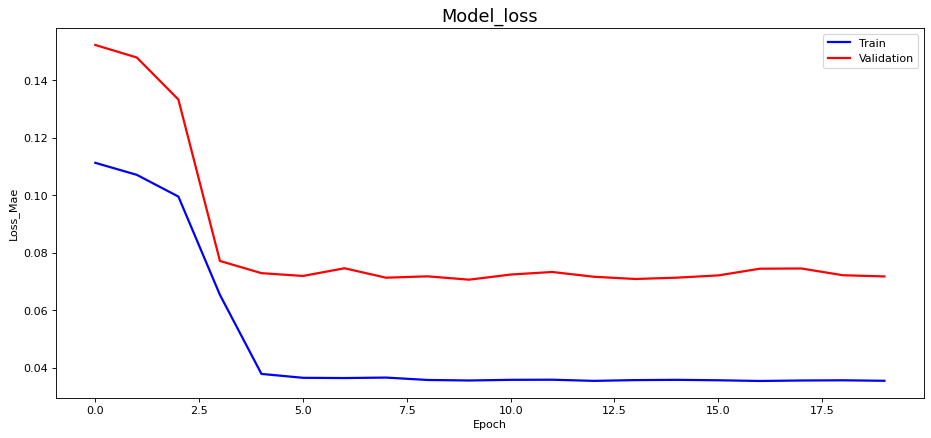

In [136]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

fig, ax = plt.subplots(figsize=(14,6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model_loss', fontsize = 16)
ax.set_ylabel('Loss_Mae')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

0.4612011089920998


C:\Users\aggelosuser\AppData\Local\Temp\ipykernel_39352\341368258.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




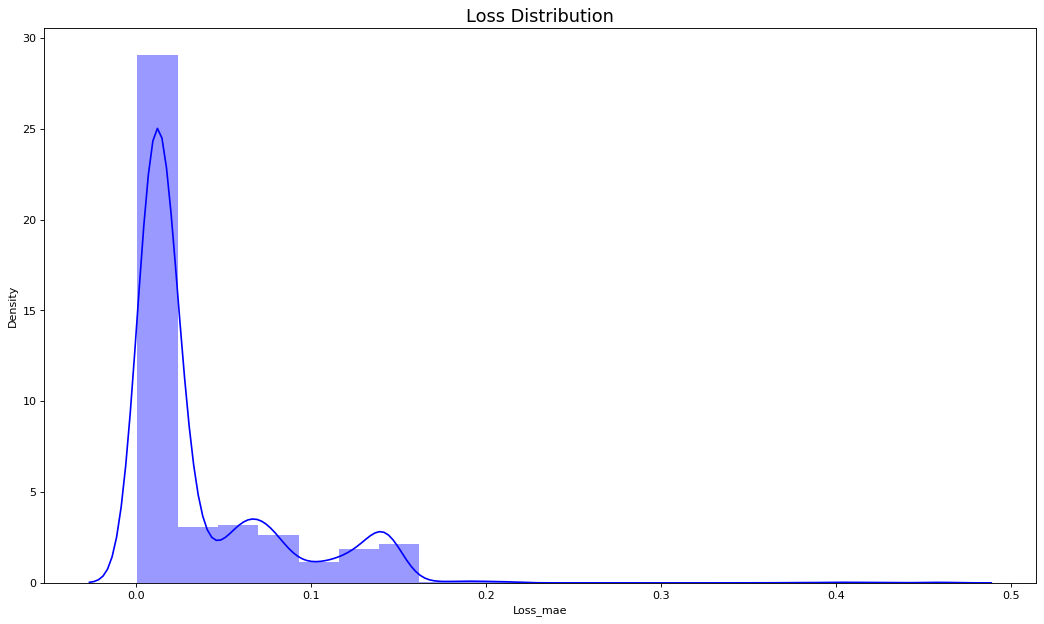

In [167]:
X_pred = model.predict(X_train)
X_pred=X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=dataset.columns)
X_pred.index=dataset.index

scored = pd.DataFrame(index=dataset.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae']=np.mean(np.abs(X_pred-Xtrain), axis=1)
print(np.max(scored['Loss_mae']))
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins=20, kde=True, color='blue');
#plot.xlim([0.0,.5])

In [171]:
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=df.columns)
X_pred.index = df.index

scored = pd.DataFrame(index=df.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis=1)
scored['Threshold'] = 0.4612011089920998
 #np.max(scored['Loss_mae']) #np.percentile(scored['Loss_mae'], 98)
print(scored['Threshold'])
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

0       0.461201
1       0.461201
2       0.461201
3       0.461201
4       0.461201
          ...   
3345    0.461201
3346    0.461201
3347    0.461201
3348    0.461201
3349    0.461201
Name: Threshold, Length: 3350, dtype: float64


,Loss_mae,Threshold,Anomaly
0,0.057909,0.461201,False
1,0.056303,0.461201,False
2,0.181656,0.461201,False
3,0.065740,0.461201,False
4,0.047887,0.461201,False


In [172]:
anomalies = []
y_pred = []
print(scored.shape)
for i in range(scored.shape[0]):
    if (scored.iloc[i][2] == True):
        anomalies.append(i)
        y_pred.append(1)
    else:
        y_pred.append(0)

# print the anomalies
print(anomalies)
#print(y_pred.shape)
        

(3350, 3)
[3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314,

In [177]:

X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=df.columns)
X_pred_train.index = dataset.index

scored_train = pd.DataFrame(index=df.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis=1)
scored_train['Threshold'] = 0.275
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
#scored = pd.concat([scored_train, scored])

In [179]:
roc_auc = roc_auc_score(y_true, y_pred)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy_score :", acc)
print("roc_auc :", roc_auc)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy_score : 1.0
roc_auc : 1.0
